<a href="https://colab.research.google.com/github/AjayINSE6220/Ajay_INSE_6220_Project-/blob/main/Principal_Component_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [103]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [105]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification. 
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [106]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/AjayINSE6220/Ajay_INSE_6220_Project-/main/INSE-6220%20(Data%20set).csv')
df.head(25)

sr      rr       t      lm      bo    rem   sr.1     hr  sl
0   60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
1   48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0
2   56.88  19.376  95.376   9.376  94.064  83.44  6.376  58.44   1
3   47.00  16.800  97.200   5.600  95.800  68.00  7.800  52.00   0
4   50.00  18.000  99.000   8.000  97.000  80.00  9.000  55.00   0
5   45.28  16.112  96.168   4.224  95.112  61.12  7.112  50.28   0
6   55.52  19.104  95.104   9.104  93.656  82.76  6.104  57.76   1
7   73.44  21.344  93.344  11.344  91.344  91.72  4.016  63.36   2
8   59.28  19.856  95.856   9.856  94.784  84.64  6.856  59.64   1
9   48.60  17.440  98.160   6.880  96.440  74.40  8.440  53.60   0
10  52.32  18.464  94.464   8.464  92.696  81.16  5.464  56.16   1
11  52.64  18.528  94.528   8.528  92.792  81.32  5.528  56.32   1
12  63.68  20.368  92.368  10.368  90.368  86.84  2.552  60.92   2
13  77.60  21.760  93.760  11.760  91.760  93.80  4.640  64.40   2
14  77.28  21.728  93.728  11.728  91.728  93.64  4.592  64.32   2
15  69.76  20.976  92.976  10.976  90.976  89.88  3.464  62.44   2
16  53.68  18.736  94.736   8.736  93.104  81.84  5.736  56.84   1
17  78.56  21.856  93.856  11.856  91.856  94.28  4.784  64.64   2
18  50.96  18.192  94.192   8.192  92.288  80.48  5.192  55.48   1
19  62.08  20.208  92.208  10.208  90.208  86.04  2.312  60.52   2
20  49.12  17.648  98.472   7.296  96.648  76.48  8.648  54.12   0
21  47.68  17.072  97.608   6.144  96.072  70.72  8.072  52.68   0
22  60.00  20.000  92.000  10.000  90.000  85.00  2.000  60.00   2
23  48.48  17.392  98.088   6.784  96.392  73.92  8.392  53.48   0
24  46.12  16.448  96.672   4.896  95.448  64.48  7.448  51.12   0

In [107]:
len(df.index)

378

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      378 non-null    float64
 1   rr      378 non-null    float64
 2   t       378 non-null    float64
 3   lm      378 non-null    float64
 4   bo      378 non-null    float64
 5   rem     378 non-null    float64
 6   sr.1    378 non-null    float64
 7   hr      378 non-null    float64
 8   sl      378 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 26.7 KB


In [109]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [110]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

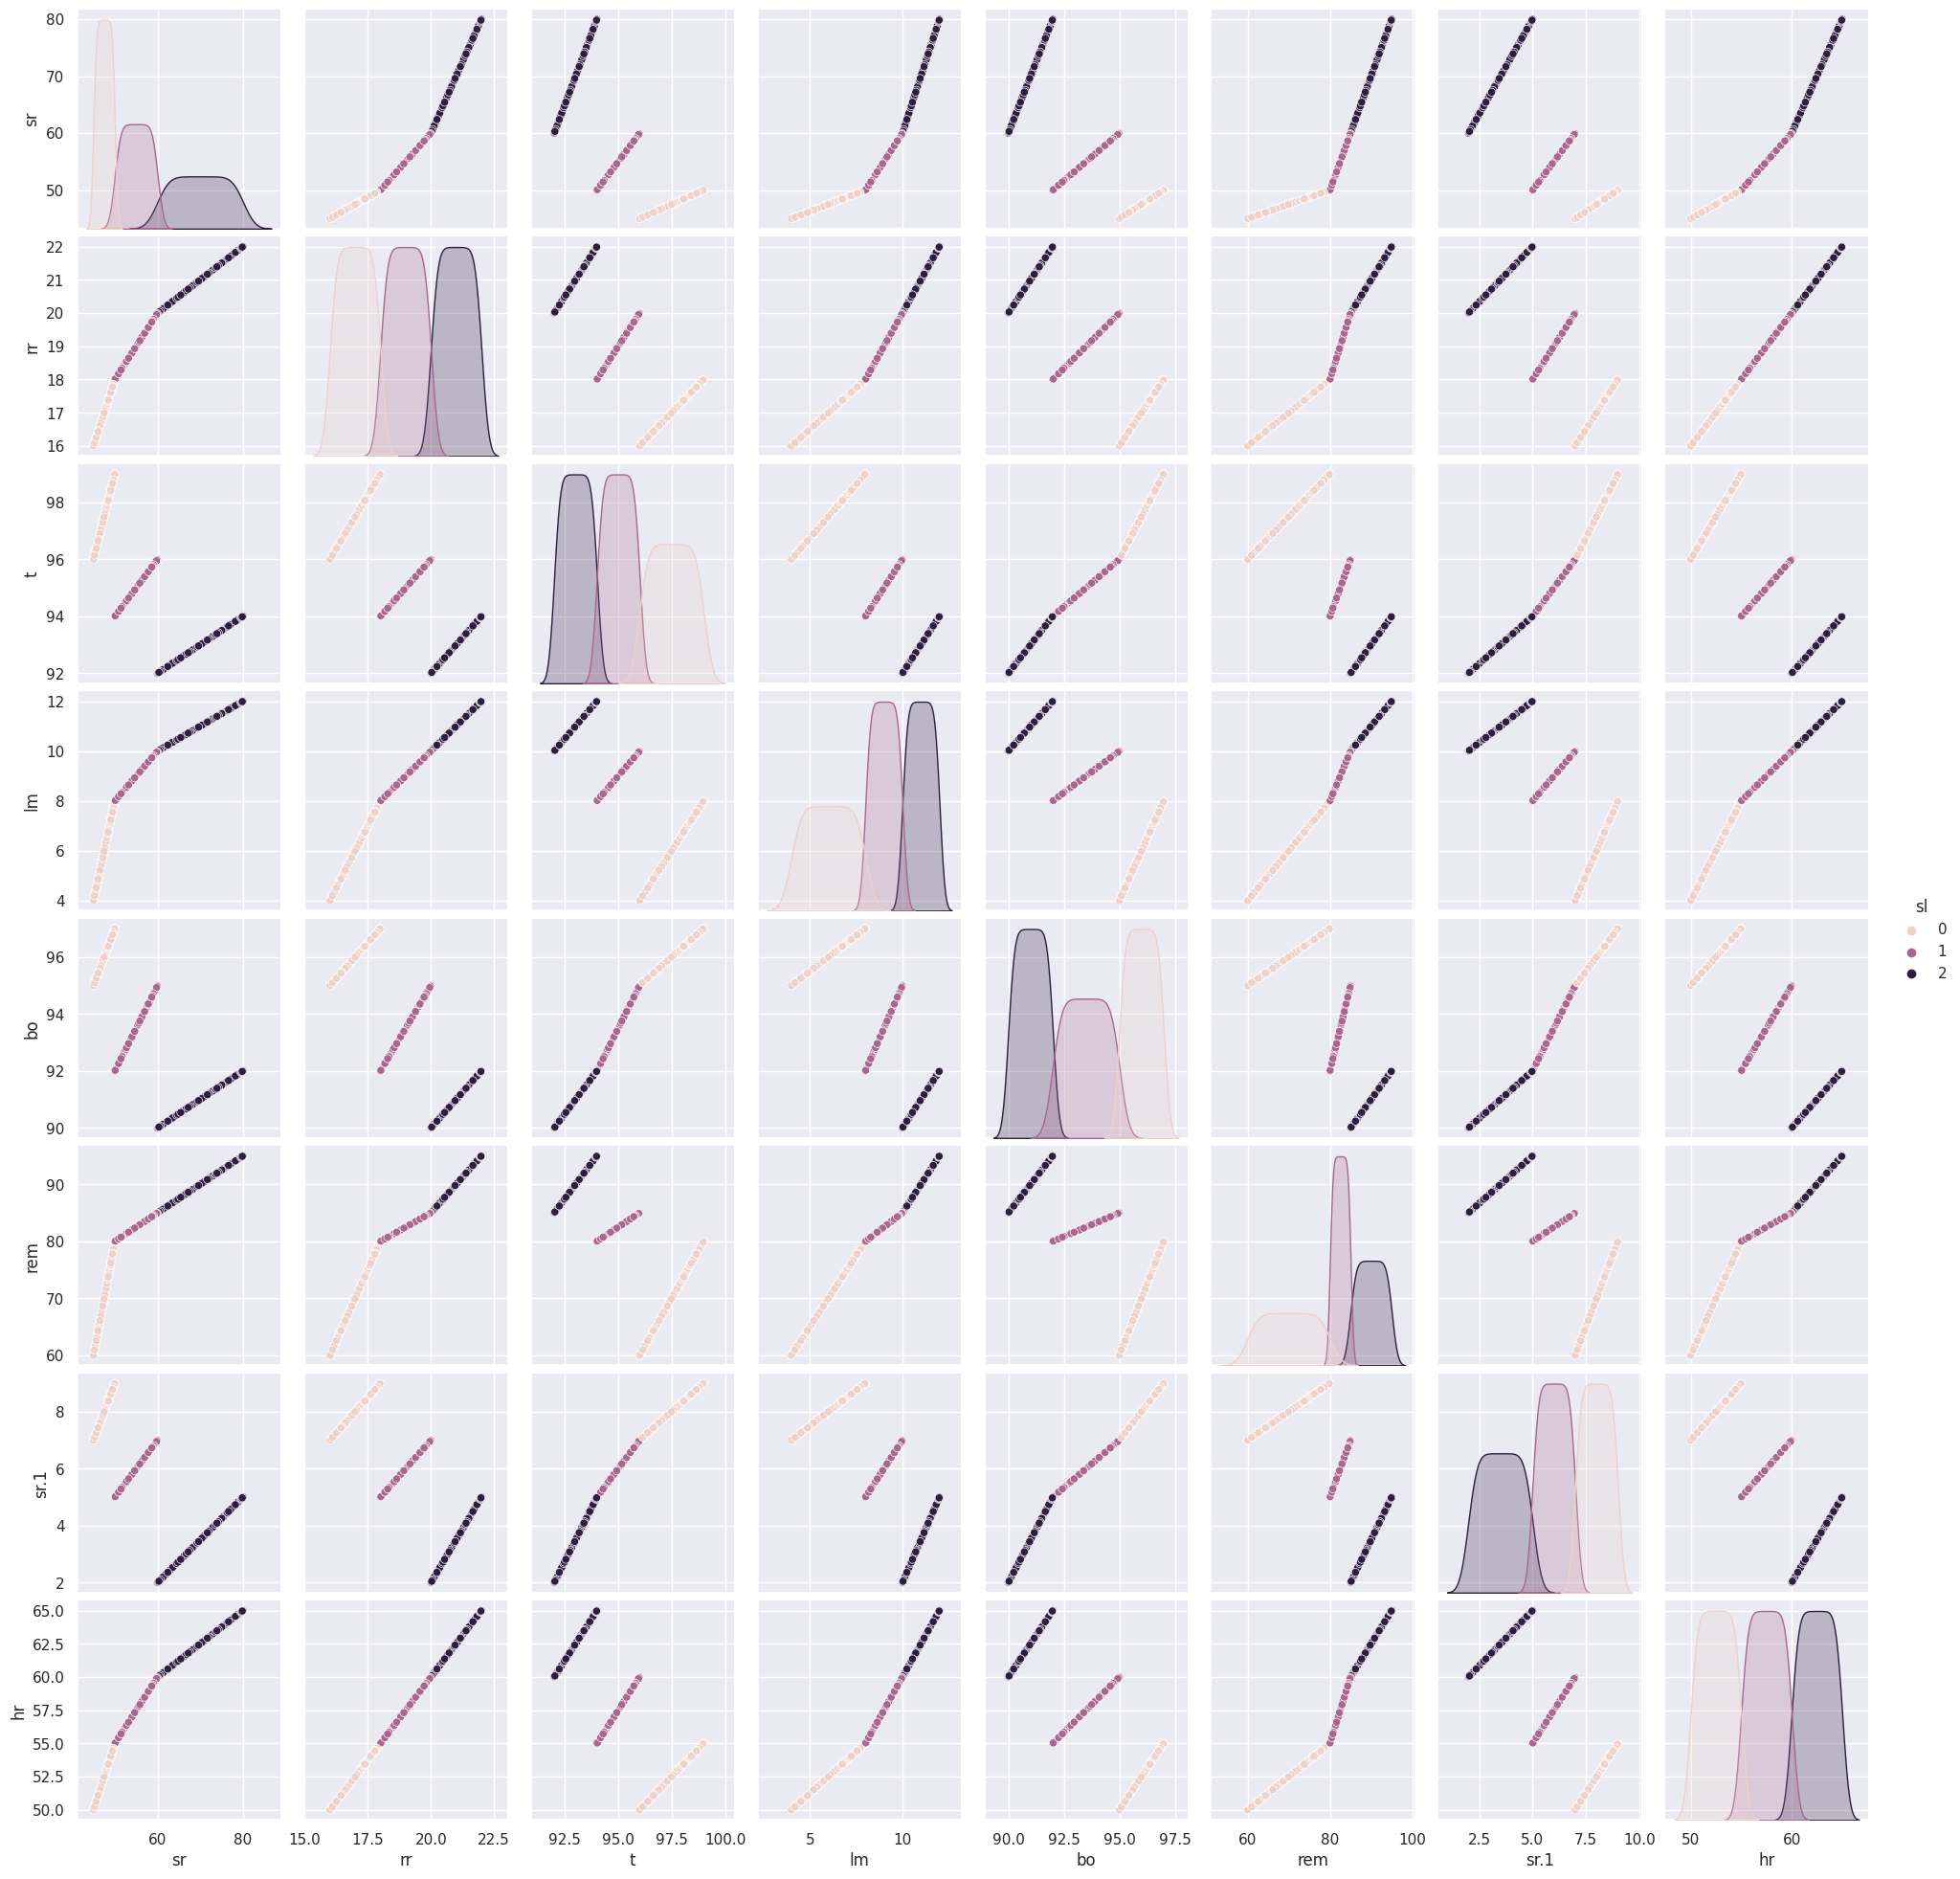

In [111]:
sns.pairplot(df, hue='sl')
plt.show()

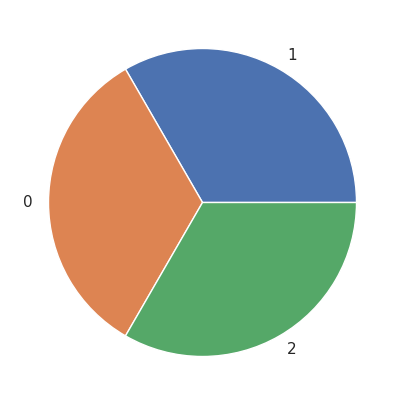

In [113]:
y =df['sl']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [115]:
X = df.drop(columns=['sl'])
X.head(10)

sr      rr       t      lm      bo    rem   sr.1     hr
0  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00
1  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12
2  56.88  19.376  95.376   9.376  94.064  83.44  6.376  58.44
3  47.00  16.800  97.200   5.600  95.800  68.00  7.800  52.00
4  50.00  18.000  99.000   8.000  97.000  80.00  9.000  55.00
5  45.28  16.112  96.168   4.224  95.112  61.12  7.112  50.28
6  55.52  19.104  95.104   9.104  93.656  82.76  6.104  57.76
7  73.44  21.344  93.344  11.344  91.344  91.72  4.016  63.36
8  59.28  19.856  95.856   9.856  94.784  84.64  6.856  59.64
9  48.60  17.440  98.160   6.880  96.440  74.40  8.440  53.60

In [116]:
X.describe().transpose()

count       mean        std   min     25%   50%     75%   max
sr    378.0  57.500000  10.128577  45.0  48.770  55.0  64.920  80.0
rr    378.0  19.000000   1.735887  16.0  17.508  19.0  20.492  22.0
t     378.0  95.166667   1.969500  92.0  93.508  95.0  96.738  99.0
lm    378.0   8.666667   2.216428   4.0   7.016   9.0  10.492  12.0
bo    378.0  93.500000   2.158418  90.0  91.508  93.5  95.492  97.0
rem   378.0  80.833333   9.115484  60.0  75.080  82.5  87.460  95.0
sr.1  378.0   5.833333   1.969500   2.0   4.262   6.0   7.492   9.0
hr    378.0  57.500000   4.339718  50.0  53.770  57.5  61.230  65.0

**Standardize the Data**

In [117]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

sr        rr         t        lm        bo       rem      sr.1  \
0  0.247154  0.576838  0.423680  0.602366  0.695874  0.457704  0.593152   
1 -0.927320 -1.010620  1.375435 -0.980652  1.274842 -0.917604  1.227656   
2 -0.061294  0.216891  0.106428  0.320459  0.261649  0.286339  0.275901   
3 -1.038045 -1.269043  1.033780 -1.385442  1.067007 -1.409727  0.999885   
4 -0.741461 -0.576838  1.948929 -0.301183  1.623707 -0.091541  1.609984   
5 -1.208086 -1.665907  0.509094 -2.007083  0.747833 -2.165487  0.650095   
6 -0.195746  0.059991 -0.031861  0.197576  0.072371  0.211642  0.137611   
7  1.575851  1.352108 -0.926673  1.209551 -1.000204  1.195888 -0.923962   
8  0.175973  0.493773  0.350468  0.537310  0.595669  0.418158  0.519940   
9 -0.879867 -0.899867  1.521859 -0.807170  1.363914 -0.706694  1.325271   

         hr  
0  0.576838  
1 -1.010620  
2  0.216891  
3 -1.269043  
4 -0.576838  
5 -1.665907  
6  0.059991  
7  1.352108  
8  0.493773  
9 -0.899867

In [118]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
sr    378.0  0.000000e+00  1.001325 -1.235768 -0.863060 -0.247154  0.733552   
rr    378.0  4.699357e-18  1.001325 -1.730513 -0.860642  0.000000  0.860642   
t     378.0  1.205385e-14  1.001325 -1.609984 -0.843293 -0.084736  0.798891   
lm    378.0  2.772620e-16  1.001325 -2.108281 -0.745729  0.150591  0.824639   
bo    378.0  7.049035e-18  1.001325 -1.623707 -0.924121  0.000000  0.924121   
rem   378.0  5.051808e-16  1.001325 -2.288518 -0.631997  0.183081  0.727932   
sr.1  378.0  1.174839e-16  1.001325 -1.948929 -0.798891  0.084736  0.843293   
hr    378.0 -4.699357e-18  1.001325 -1.730513 -0.860642  0.000000  0.860642   

           max  
sr    2.224382  
rr    1.730513  
t     1.948929  
lm    1.505915  
bo    1.623707  
rem   1.556192  
sr.1  1.609984  
hr    1.730513

**Observations and variables**

In [119]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

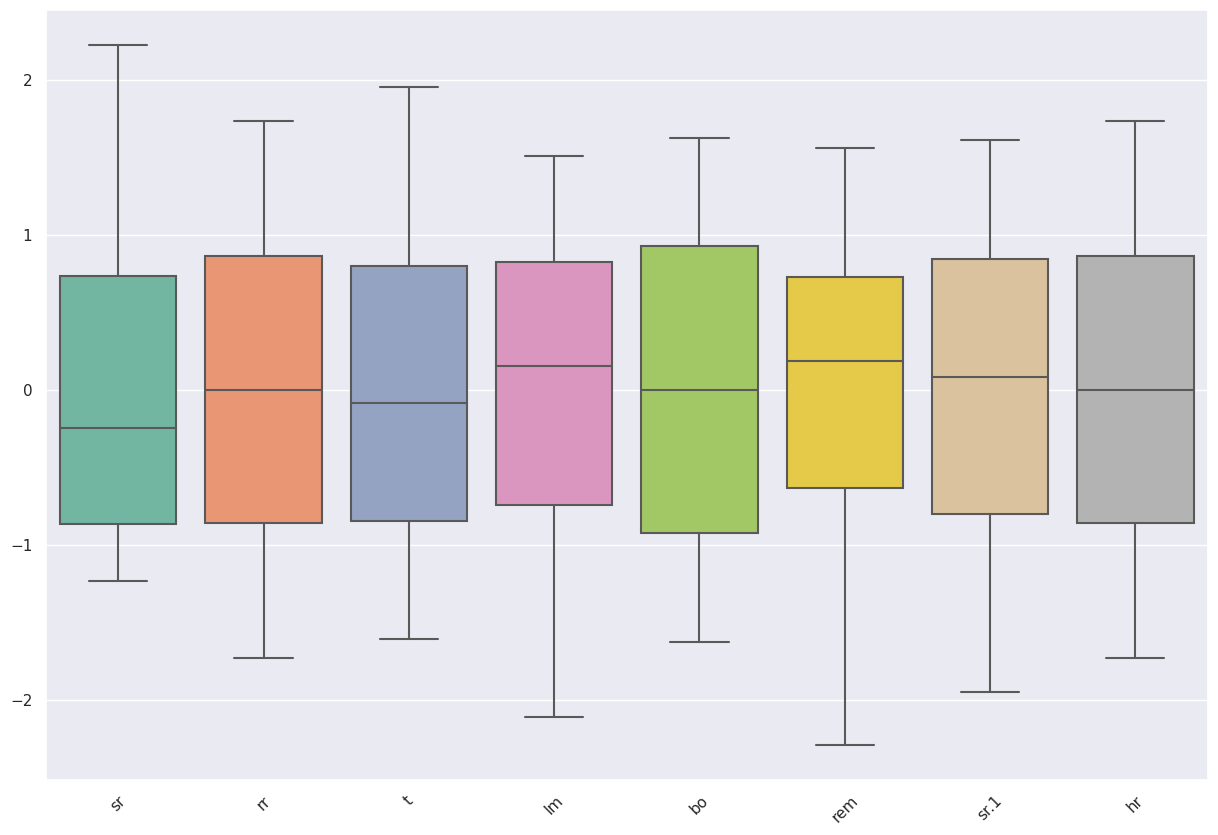

In [120]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


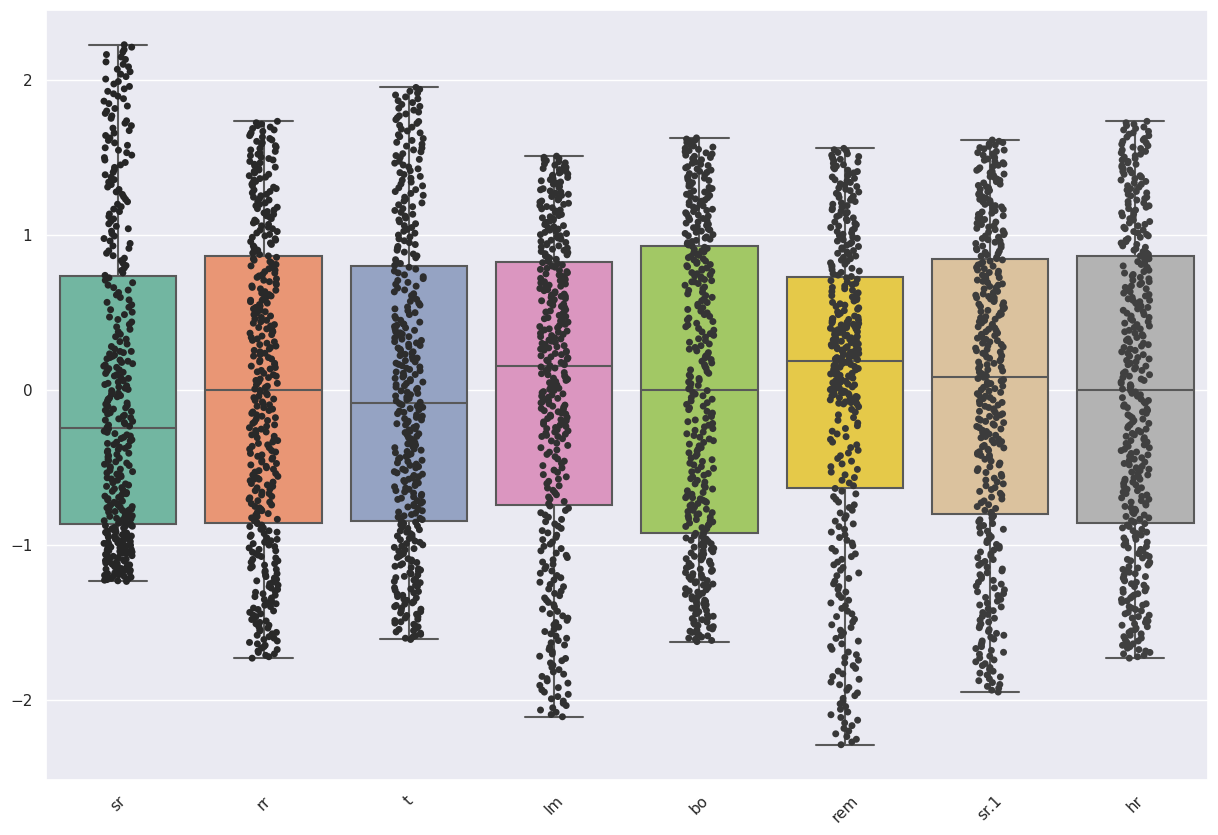

In [121]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

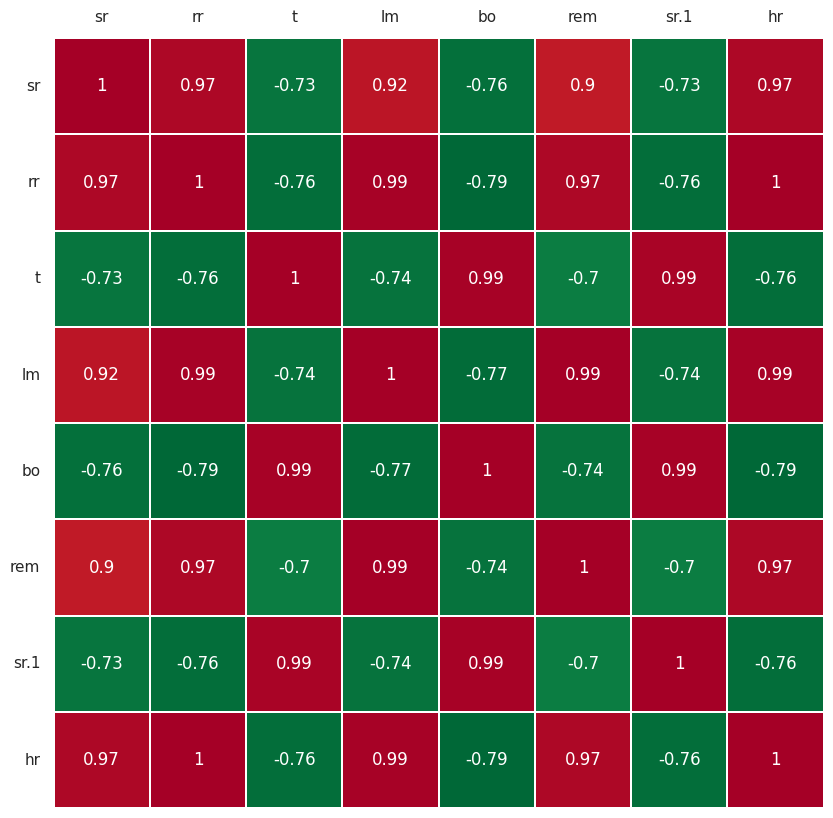

In [122]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

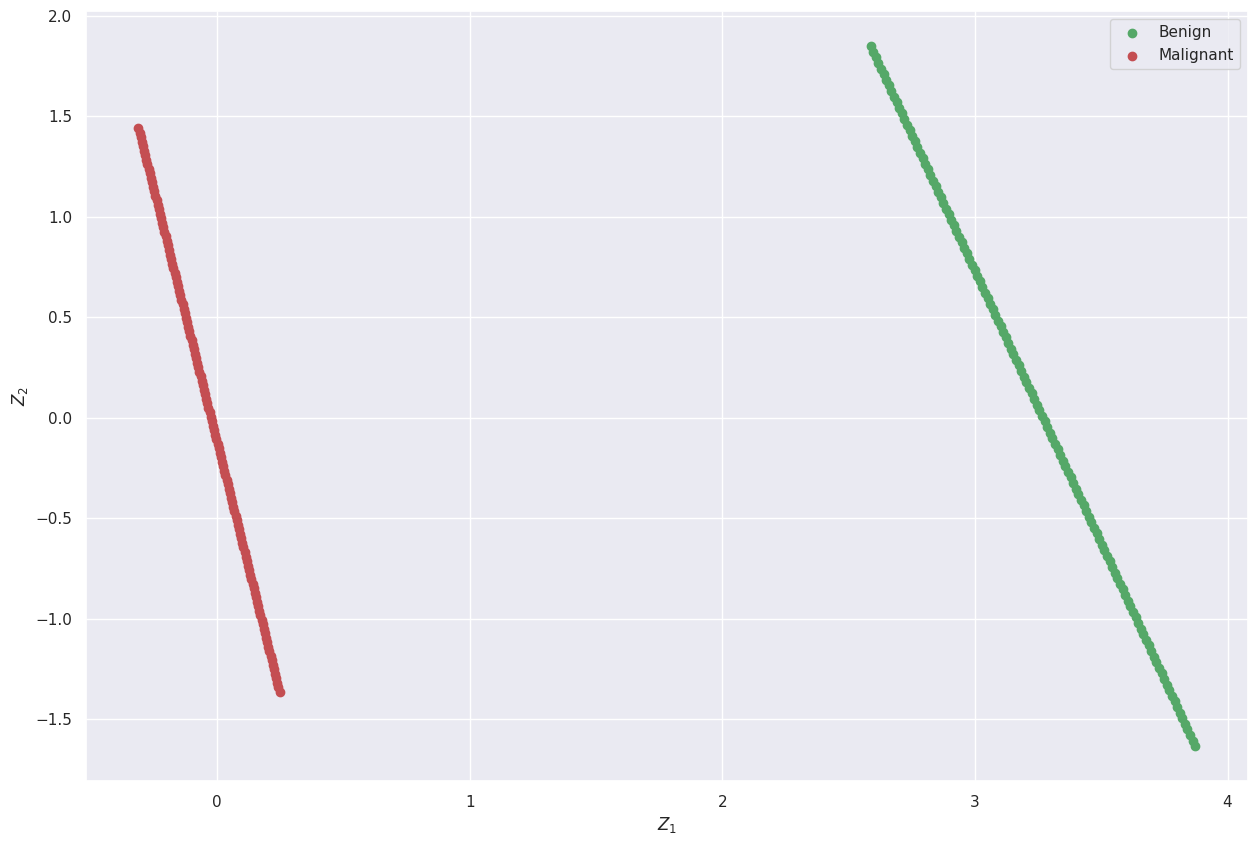

In [123]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.35461949,  0.23968009,  0.7630219 , -0.36224674,  0.01097081,
        -0.24627236, -0.02049084,  0.2053851 ],
       [-0.36809019,  0.24382688,  0.09297029,  0.35811136, -0.00830344,
         0.31219956, -0.68095535, -0.32700634],
       [ 0.33685588,  0.47904035,  0.00208867, -0.20827397,  0.71228555,
         0.32544701,  0.01992043,  0.0016622 ],
       [-0.36271663,  0.27411187, -0.36701397,  0.15701352, -0.00488378,
         0.08239837, -0.01569954,  0.79176196],
       [ 0.344184  ,  0.43985602,  0.06146893,  0.52001986, -0.01228012,
        -0.64199628, -0.03929623, -0.00327895],
       [-0.35537345,  0.31006298, -0.51184763, -0.46391405,  0.00954044,
        -0.40023492, -0.01474844, -0.37399183],
       [ 0.33686212,  0.47897913,  0.00637059, -0.242119  , -0.70151648,
         0.32544701,  0.01992043,  0.0016622 ],
       [-0.36809019,  0.24382688,  0.09297029,  0.35811136, -0.00830344,
         0.22563939,  0.73012198, -0.29001835]])

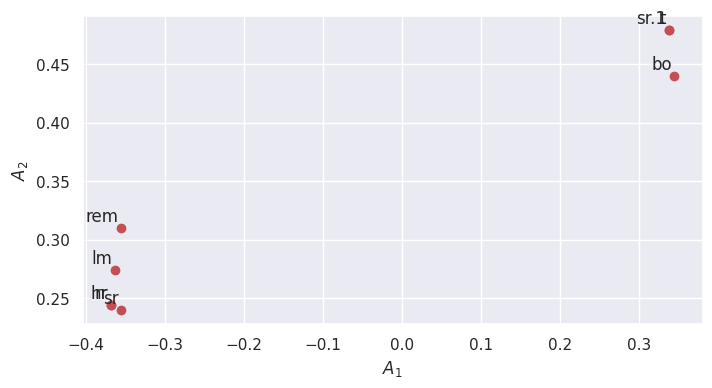

In [124]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


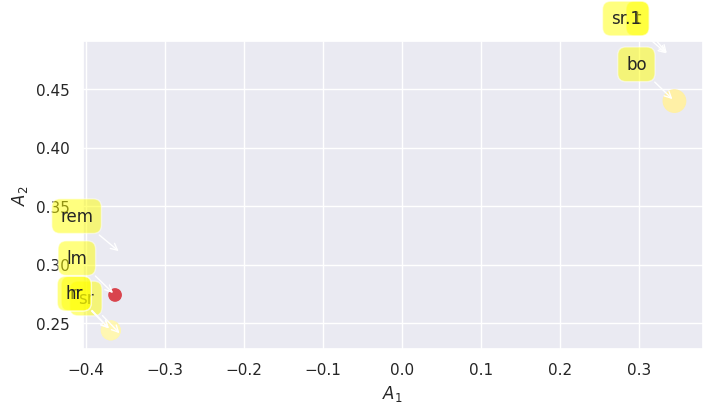

In [125]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([6.99308594e+00, 8.76295071e-01, 1.21679141e-01, 1.56479733e-02,
       1.45120326e-02, 1.66141003e-30, 2.87388163e-31, 1.14706822e-31])

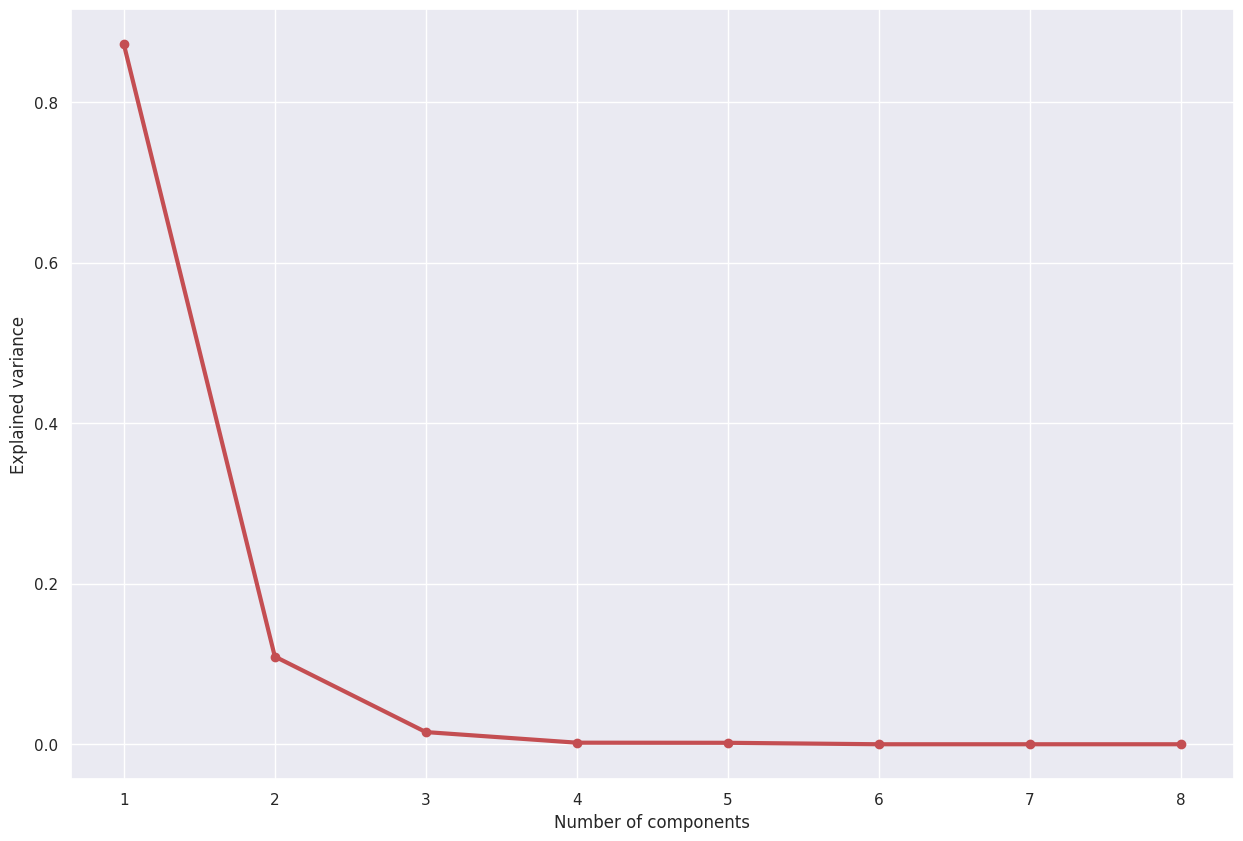

In [126]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

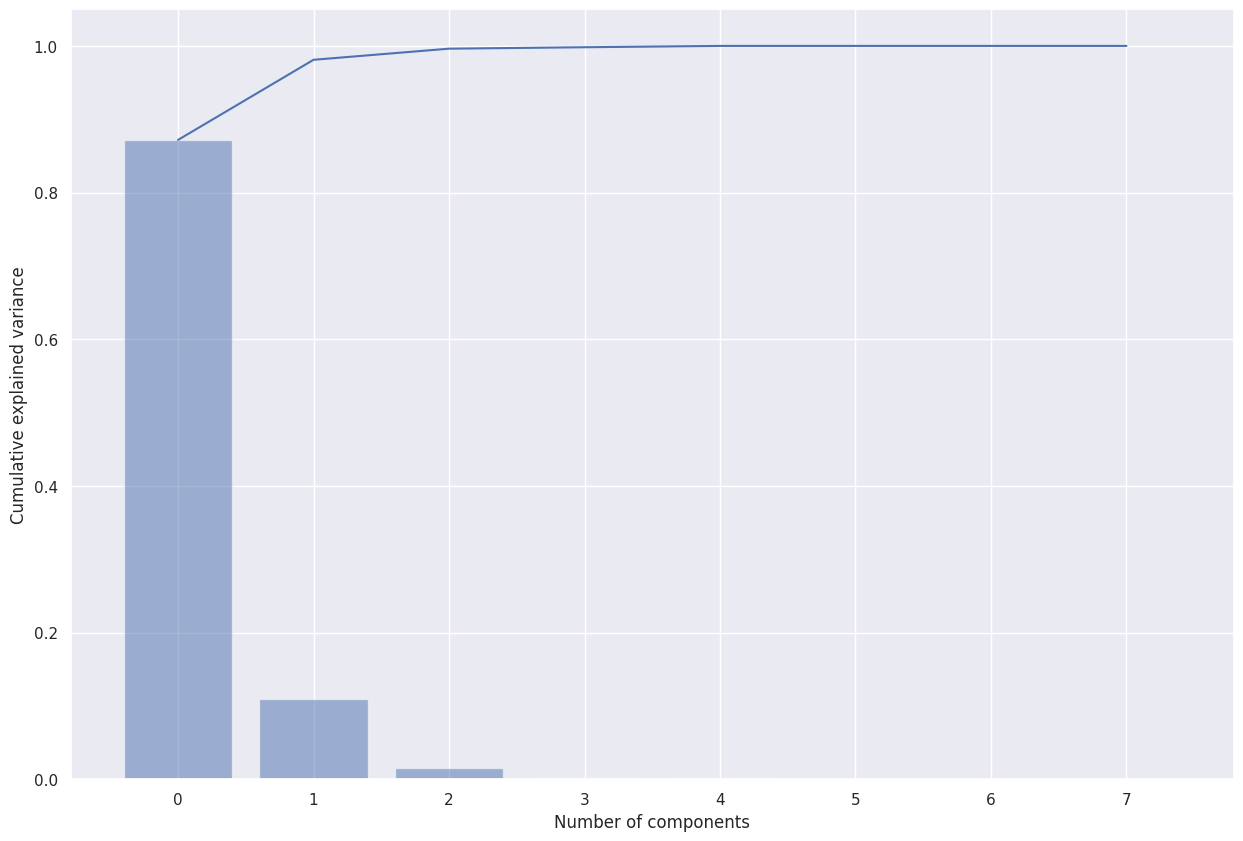

In [128]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [129]:
print(ell.round(4)*100)

[87.18 10.92  1.52  0.2   0.18  0.    0.    0.  ]


**Biplot**

array([ 1.44071941,  0.53924125,  0.56592339, -0.24104656,  1.84901007,
       -1.4393457 ,  0.18460205,  0.41299554,  1.23884341,  0.87365031,
       -0.71262464, -0.62290197, -1.17327247,  1.08910977,  1.03710098,
       -0.18510551, -0.3313033 ,  1.24513613, -1.09394598, -1.4333164 ,
        1.23592679,  0.23269961, -1.77137352,  0.79004804, -0.85412984,
       -1.61534716, -0.86121975,  0.72504826,  1.34739648,  0.38699114,
       -1.30329444,  0.52106206,  1.57033585, -0.35373396, -0.35251625,
        0.34161672,  0.77705705,  1.01453674, -0.51972078, -1.51132958,
       -1.29582199,  1.79327523, -1.69336034,  0.65071093, -1.22852998,
        0.79023007, -1.52294796,  0.92938515,  0.45377006, -1.18366865,
       -1.20609932, -0.26401129, -0.41914506,  0.00515671, -0.69019397,
       -0.91450064, -0.93923293, -0.47115384, -1.49508054, -1.25128565,
        0.69904387,  0.9850922 , -1.60655023, -0.37616463, -1.53733398,
       -1.40731201,  1.3491537 , -0.12942729, -0.31512748,  0.06

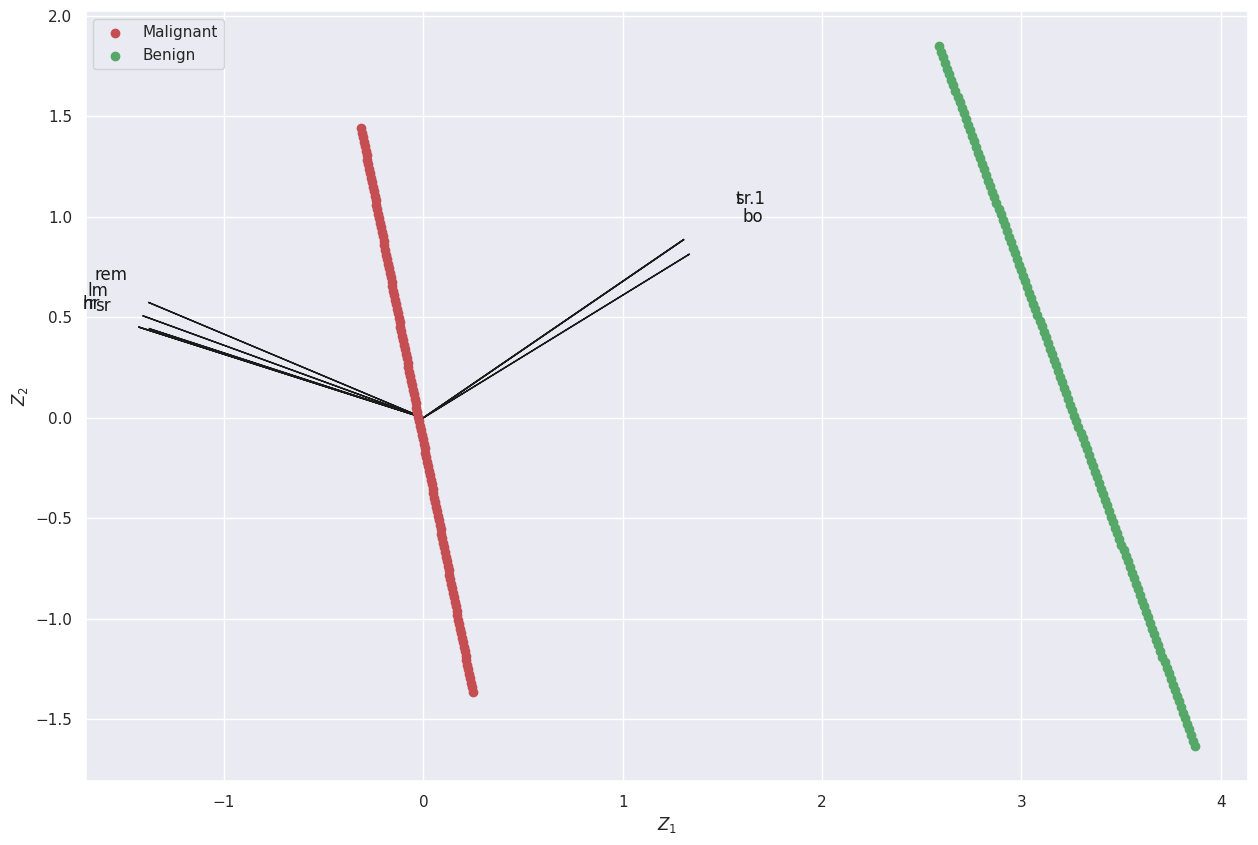

In [130]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [131]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [134]:
out['PC']

PC1       PC2
0   -0.311407  1.440719
1    3.070289  0.539241
2   -0.137081  0.565923
3    3.358163 -0.241047
4    2.587073  1.849010
..        ...       ...
373 -0.244359  1.104259
374 -3.175751 -0.211110
375  2.988040  0.762181
376 -0.235419  1.059398
377 -3.411821  0.491009

[378 rows x 2 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.62%] of the variance'}, xlabel='PC1 (87.1% expl.var)', ylabel='PC2 (10.9% expl.var)'>)

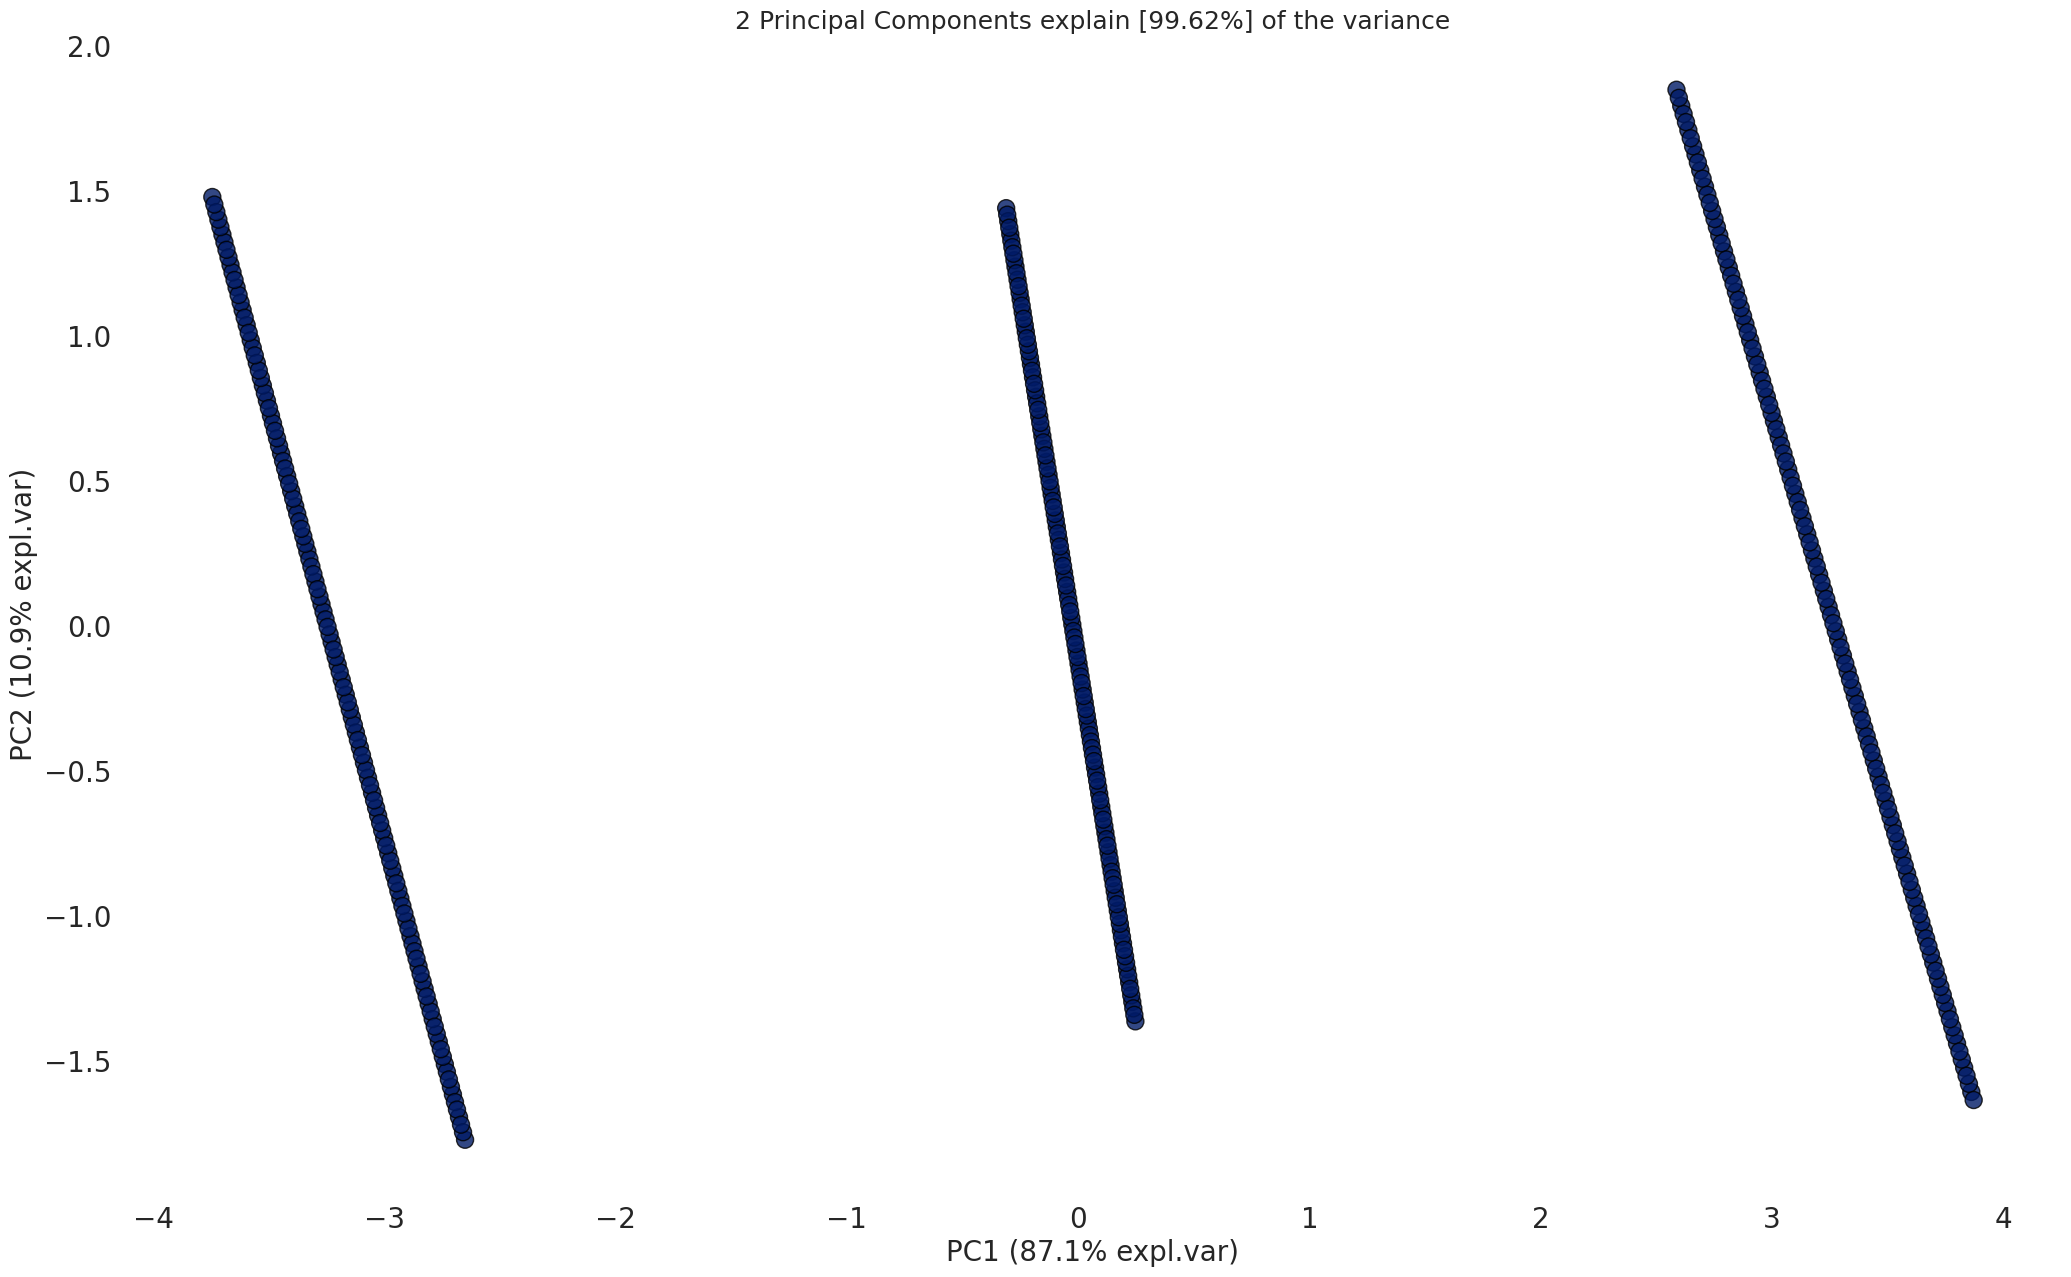

In [135]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [136]:
A = out['loadings'].T
A

PC1       PC2
sr   -0.354619  0.239680
rr   -0.368090  0.243827
t     0.336856  0.479040
lm   -0.362717  0.274112
bo    0.344184  0.439856
rem  -0.355373  0.310063
sr.1  0.336862  0.478979
hr   -0.368090  0.243827

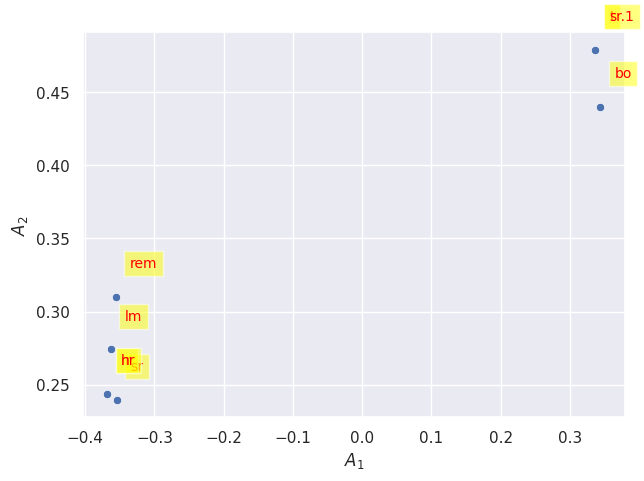

In [137]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

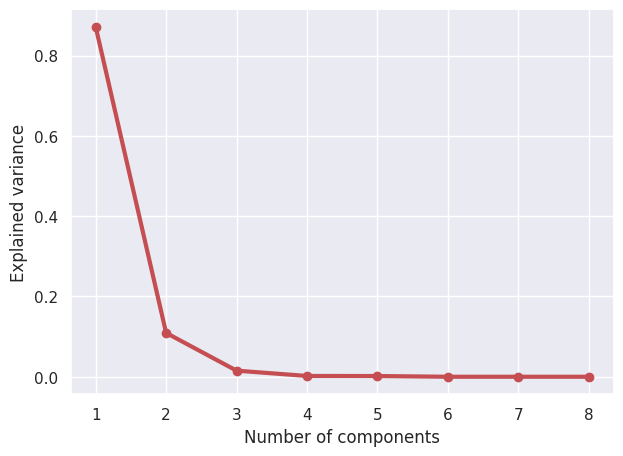

In [138]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

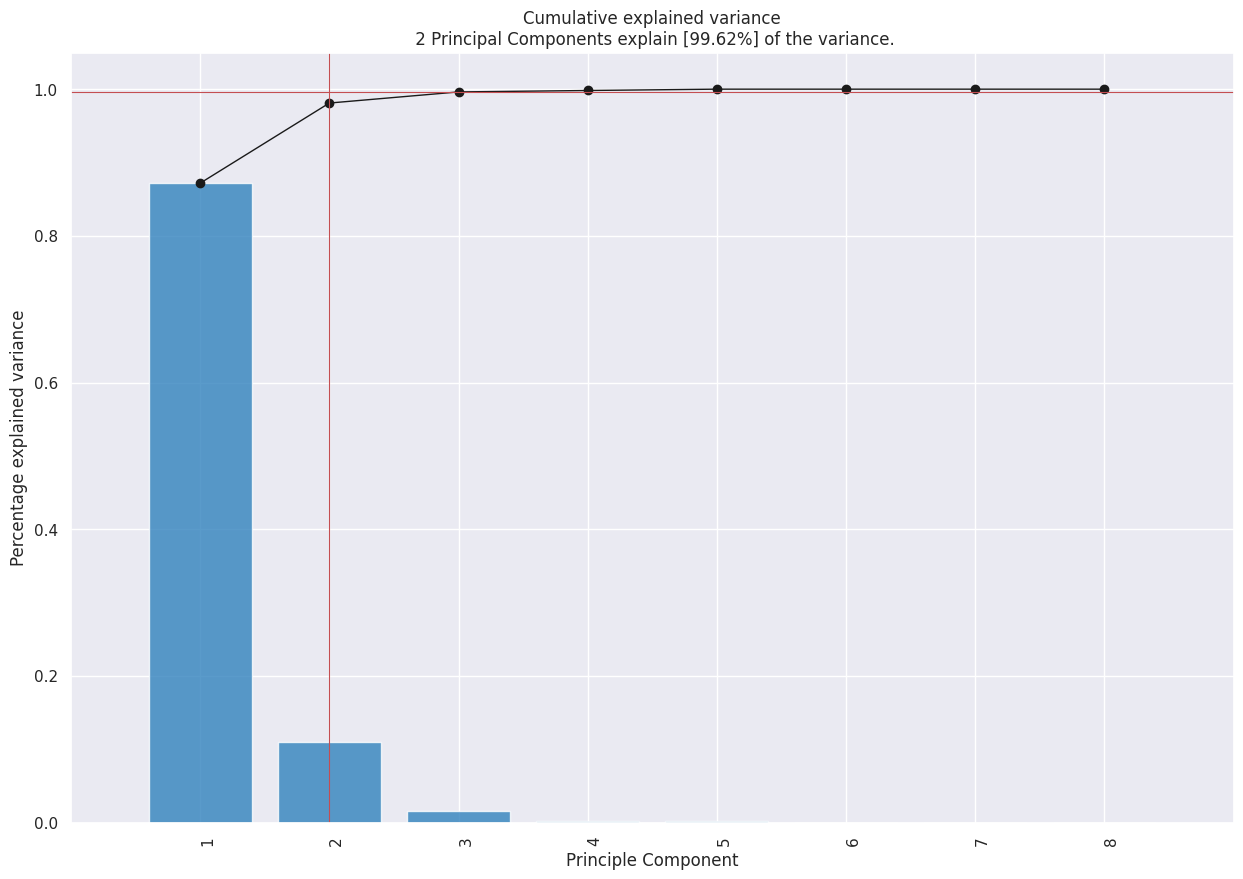

<Figure size 700x500 with 0 Axes>

In [139]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


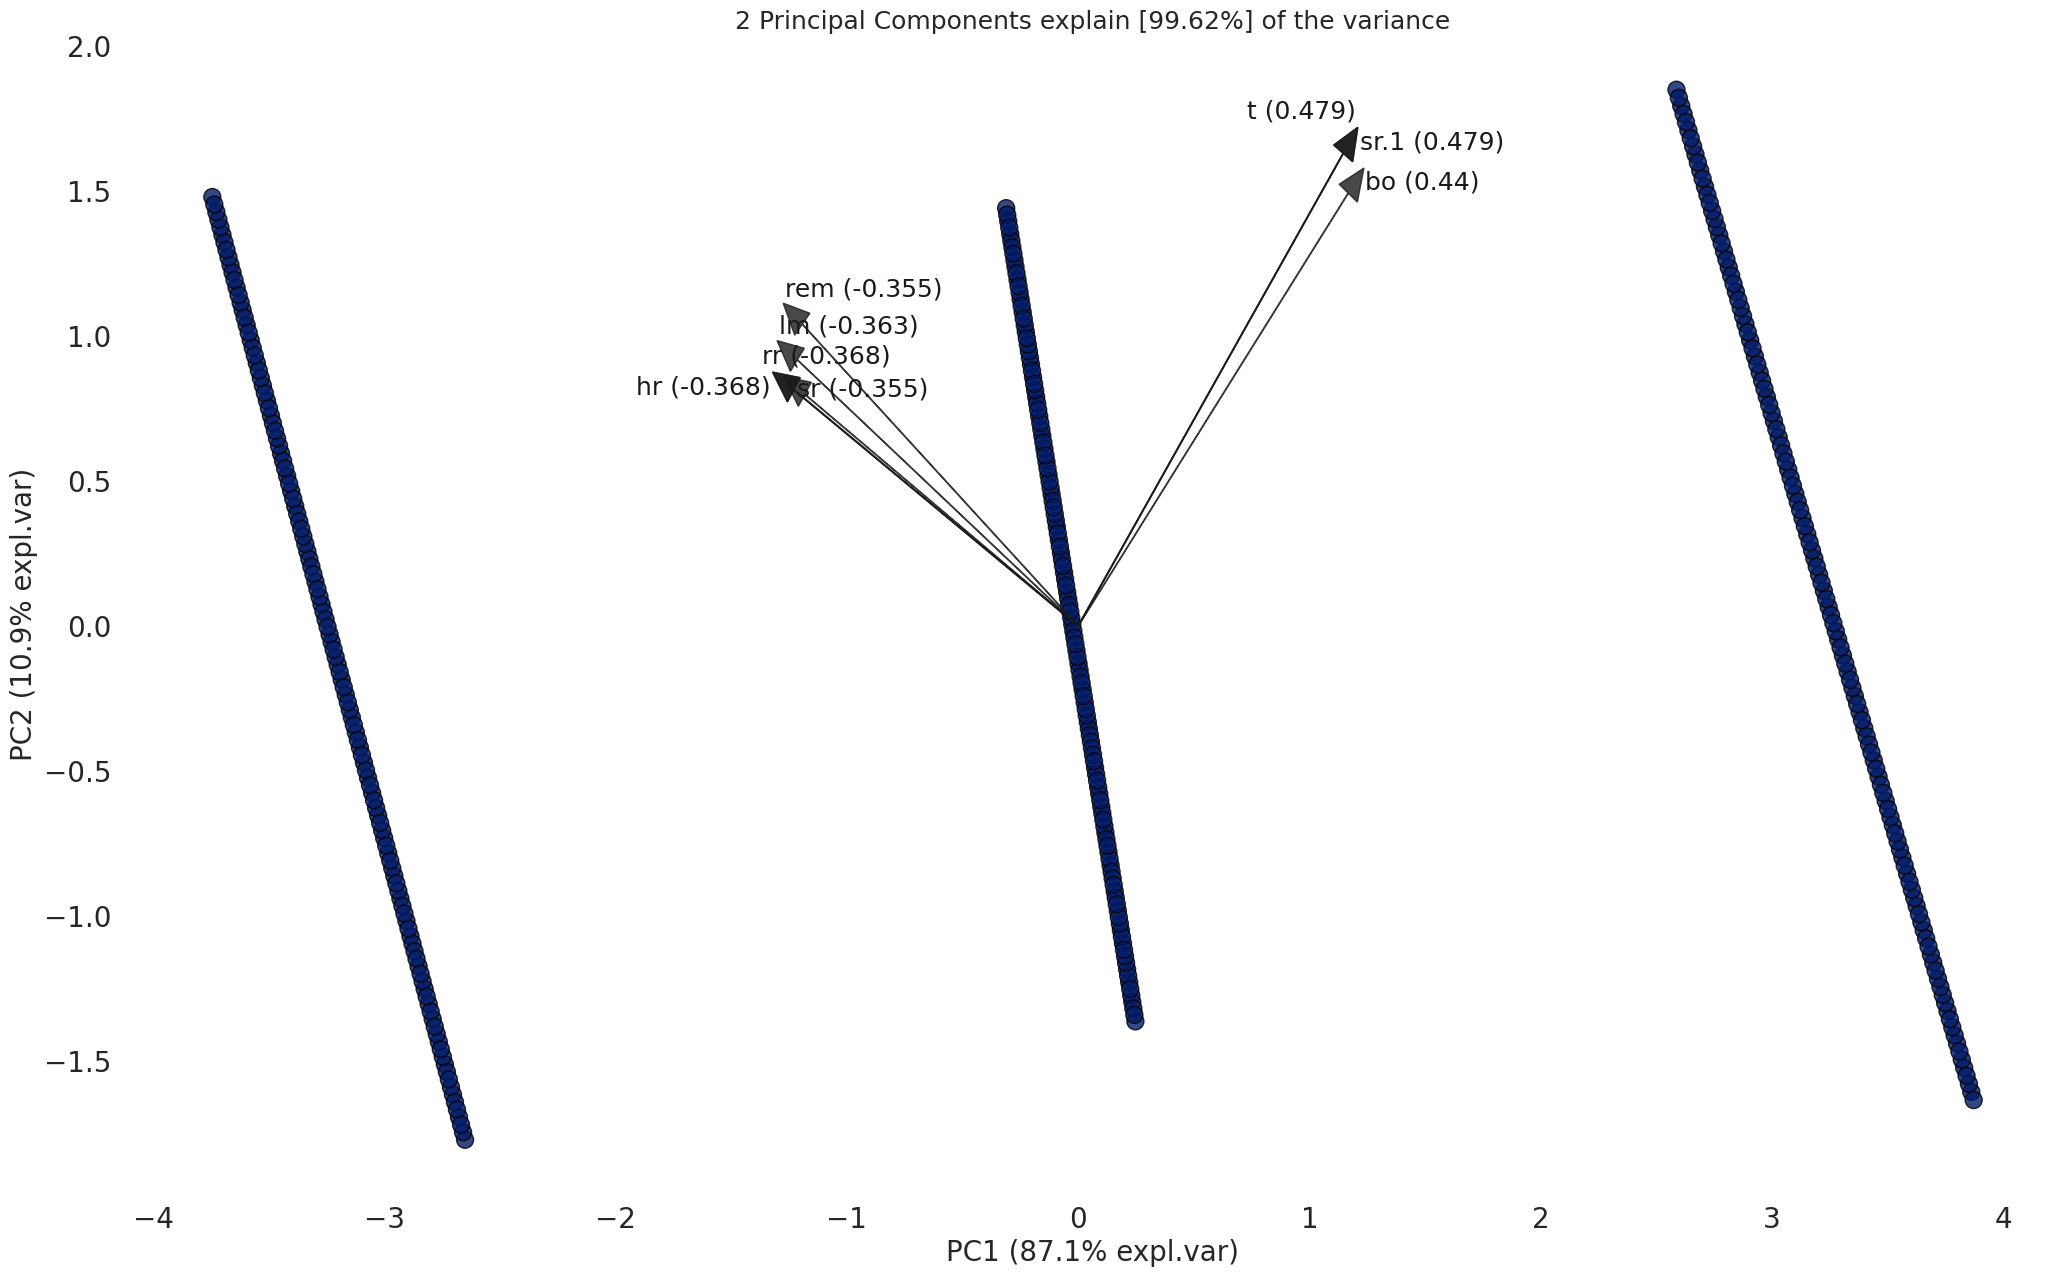

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.62%] of the variance'}, xlabel='PC1 (87.1% expl.var)', ylabel='PC2 (10.9% expl.var)'>)

In [140]:
model.biplot(label=False, legend=False, color_arrow='k')

In [152]:
model.biplot3d(legend=False)

ValueError: ignored

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [145]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [146]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [147]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (340, 9)
Unseen Data For Predictions: (38, 9)


In [150]:
from pycaret.classification import *
clf = setup(data=data, target='sl', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target                sl
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (340, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (237, 6)
12                    Transformed Test Set          (103, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8fdd
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sl',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [151]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
ridge                    Ridge Classifier    1.0000  0.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    0.9958  0.9969  0.9958  0.9963   
ada                  Ada Boost Classifier    0.9958  1.0000  0.9958  0.9963   
gbc          Gradient Boosting Classifier    0.9958  1.0000  0.9958  0.9963   
xgboost         Extreme Gradient Boosting    0.9958  1.0000  0.9958  0.9963   
svm                   SVM - Linear Kernel    0.7384  0.0000  0.7226  0.6277   
qda       Quadratic Discriminant Analysis    0.6582  0.7500  0.6667  0.4942   
dummy                    Dummy Classifier    0.3377  0.5000  0.3333  0.1141   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.401  
knn       1.0000  1.0000  1.0000     0.014  
nb        1.0000  1.0000  1.0000     0.011  
ridge     1.0000  1.0000  1.0000     0.014  
rf        1.0000  1.0000  1.0000     0.261  
lda       1.0000  1.0000  1.0000     0.011  
et        1.0000  1.0000  1.0000     0.133  
lightgbm  1.0000  1.0000  1.0000     0.163  
dt        0.9958  0.9938  0.9940     0.010  
ada       0.9958  0.9938  0.9940     0.124  
gbc       0.9958  0.9938  0.9940     0.265  
xgboost   0.9958  0.9938  0.9940     0.051  
svm       0.6583  0.6023  0.6745     0.014  
qda       0.5474  0.4934  0.6083     0.020  
dummy     0.1705  0.0000  0.0000     0.010

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

 Create a Model

**Logistic Regresssion**

In [153]:
lr = create_model('lr')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune the model**

In [154]:
tuned_lr=tune_model(lr)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [155]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [156]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [157]:
knn = create_model('knn')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune model with K-nearest neighbour**

In [158]:
tuned_knn = tune_model(knn)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [159]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [160]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [161]:
qda=create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.7500  0.6667  0.5000  0.5556  0.5000  0.6124
1       0.6667  0.7500  0.6667  0.5000  0.5556  0.5000  0.6124
2       0.6667  0.7500  0.6667  0.5000  0.5556  0.5000  0.6124
3       0.6667  0.7500  0.6667  0.5000  0.5556  0.5000  0.6124
4       0.6667  0.7500  0.6667  0.5000  0.5556  0.5000  0.6124
5       0.6667  0.7647  0.6667  0.5111  0.5606  0.5077  0.6165
6       0.6250  0.7353  0.6667  0.4609  0.5109  0.4600  0.5884
7       0.6522  0.7500  0.6667  0.4899  0.5415  0.4889  0.6055
8       0.6522  0.7500  0.6667  0.4899  0.5415  0.4889  0.6055
9       0.6522  0.7500  0.6667  0.4899  0.5415  0.4889  0.6055
Mean    0.6582  0.7500  0.6667  0.4942  0.5474  0.4934  0.6083
SD      0.0128  0.0066  0.0000  0.0127  0.0139  0.0126  0.0075

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


**Tune QDA Model**

In [162]:
tuned_qda=tune_model(qda)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate QDA Model**

In [163]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

In [164]:
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [165]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [167]:
clf_pca = setup(data=data, target='sl', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target                sl
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (340, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (237, 3)
12                    Transformed Test Set          (103, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              91d9
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sl',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='sl')),
                ('fix_perfect', Remove_100(t

# **Comparing Models**

In [168]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy  AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  1.0  1.0000  1.0000   
ridge                    Ridge Classifier    1.0000  0.0  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0  1.0000  1.0000   
qda       Quadratic Discriminant Analysis    1.0000  1.0  1.0000  1.0000   
ada                  Ada Boost Classifier    1.0000  1.0  1.0000  1.0000   
gbc          Gradient Boosting Classifier    1.0000  1.0  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0  1.0000  1.0000   
xgboost         Extreme Gradient Boosting    1.0000  1.0  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0  1.0000  1.0000   
svm                   SVM - Linear Kernel    0.9958  0.0  0.9958  0.9963   
dummy                    Dummy Classifier    0.3377  0.5  0.3333  0.1141   

              F1   Kappa    MCC  TT (Sec)  
lr        1.0000  1.0000  1.000     0.046  
knn       1.0000  1.0000  1.000     0.078  
nb        1.0000  1.0000  1.000     0.041  
dt        1.0000  1.0000  1.000     0.043  
ridge     1.0000  1.0000  1.000     0.032  
rf        1.0000  1.0000  1.000     0.549  
qda       1.0000  1.0000  1.000     0.019  
ada       1.0000  1.0000  1.000     0.198  
gbc       1.0000  1.0000  1.000     0.589  
lda       1.0000  1.0000  1.000     0.032  
et        1.0000  1.0000  1.000     0.415  
xgboost   1.0000  1.0000  1.000     0.092  
lightgbm  1.0000  1.0000  1.000     0.083  
svm       0.9958  0.9938  0.994     0.051  
dummy     0.1705  0.0000  0.000     0.018

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# **Best model with PCA**

In [169]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [170]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Best Model**

In [171]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [172]:
lr_pca = create_model('lr')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [173]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [174]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [175]:
knn_pca = create_model('knn')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [176]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [177]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [178]:
evaluate_model(tuned_knn_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [179]:
qda_pca = create_model('qda')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


# **Tune model**

In [180]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [181]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

In [182]:
evaluate_model(tuned_qda_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [183]:
et_pca = create_model('et')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [184]:
tuned_et_pca = tune_model(et_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [186]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [188]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [189]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 14.8 MB/s eta 0:00:00


In [190]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


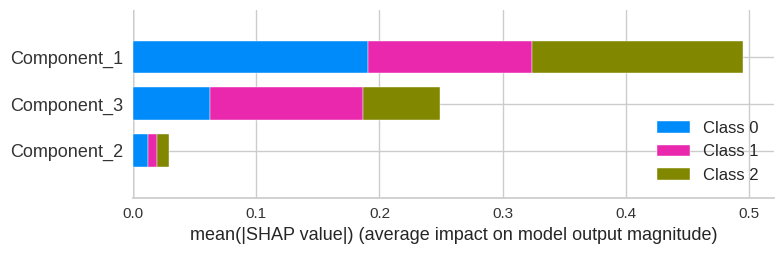

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [191]:
interpret_model(tuned_et_pca, plot='summary')


In [192]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [193]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
